# <span style="color:#bce35b;font-size:35px"><b>Week 3 & 4</b></span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<span style="color:#8c8c8c">Patrick Weatherford</span>

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

***
***

Importing libraries

In [222]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import requests
from collections import deque as deq
from itertools import permutations, dropwhile, zip_longest
import re
import math


## import custom config file with keys and change working directory
class_path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 540 - Data Preparation'
bu_path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University'
os.chdir(bu_path); import config; os.chdir(class_path)


## matplotlib default settings
plt.style.use('dark_background')
mpl.rcParams.update({'lines.linewidth':3})
mpl.rcParams.update({'axes.labelsize':14})
mpl.rcParams.update({'axes.titlesize':16})
mpl.rcParams.update({'axes.titleweight':'bold'})
mpl.rcParams.update({'figure.autolayout':True})
mpl.rcParams.update({'axes.grid':True, 'grid.color':'#424242', 'grid.linestyle':'--'})


In [154]:
## see list of current settings
# plt.rcParams.keys()

<br>
Instantiating random number generator

In [155]:
rng_seed = 777
rng = np.random.default_rng(rng_seed)

<br>

***

# <span style="color:#bce35b">Book Activities</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br>


## <span style="color:#ae8bd5">Activity 5</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

Boston Housing data set.


In [156]:
## get variable info

def skip_logic(x):
    if 7 <= x <= 20:  # get specific rows from website which hold variable info
        return False
    else:
        return True
    
data_url = "http://lib.stat.cmu.edu/datasets/boston"

var_df = pd.read_csv(data_url, sep='  +', skiprows=lambda x: skip_logic(x), header=None, engine='python', names=['VARIABLE','DESC'])  # create DataFrame of variables

var_df['VARIABLE'] = var_df['VARIABLE'].replace(' ', '')  # remove whiate space from variable name

var_df_disp = var_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])  # lef-align headers
var_df_disp.set_properties(subset=['DESC'], **{'width': '400px'})  # widen description column
var_df_disp.set_properties(**{'text-align': 'left'})  # left align all values

var_df_disp

,VARIABLE,DESC
0,CRIM,per capita crime rate by town
1,ZN,"proportion of residential land zoned for lots over 25,000 sq.ft."
2,INDUS,proportion of non-retail business acres per town
3,CHAS,Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4,NOX,nitric oxides concentration (parts per 10 million)
5,RM,average number of rooms per dwelling
6,AGE,proportion of owner-occupied units built prior to 1940
7,DIS,weighted distances to five Boston employment centres
8,RAD,index of accessibility to radial highways
9,TAX,"full-value property-tax rate per $10,000"


In [157]:
## get Boston Housing data
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)  # start data feed from 23 row
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])  # data in rows on site is not on single row. Must skip every other row, hstack, then exclude NaN values from overlapping row
labels = var_df['VARIABLE'].values  # assign variable names to list

bost_df = pd.DataFrame(data, columns=labels)  # create df

In [158]:
## first 10 rows
bost_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [159]:
## drop specified columns
bost_df.drop(['CHAS','NOX','B','LSTAT'], inplace=True, axis=1)

In [160]:
bost_df

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3.0,222.0,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,22.0


In [161]:
## last 7 rows in df
bost_df.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6.0,391.0,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6.0,391.0,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1.0,273.0,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1.0,273.0,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1.0,273.0,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1.0,273.0,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1.0,273.0,21.0,11.9


<br>

Looping through df variables using pandas implementation.

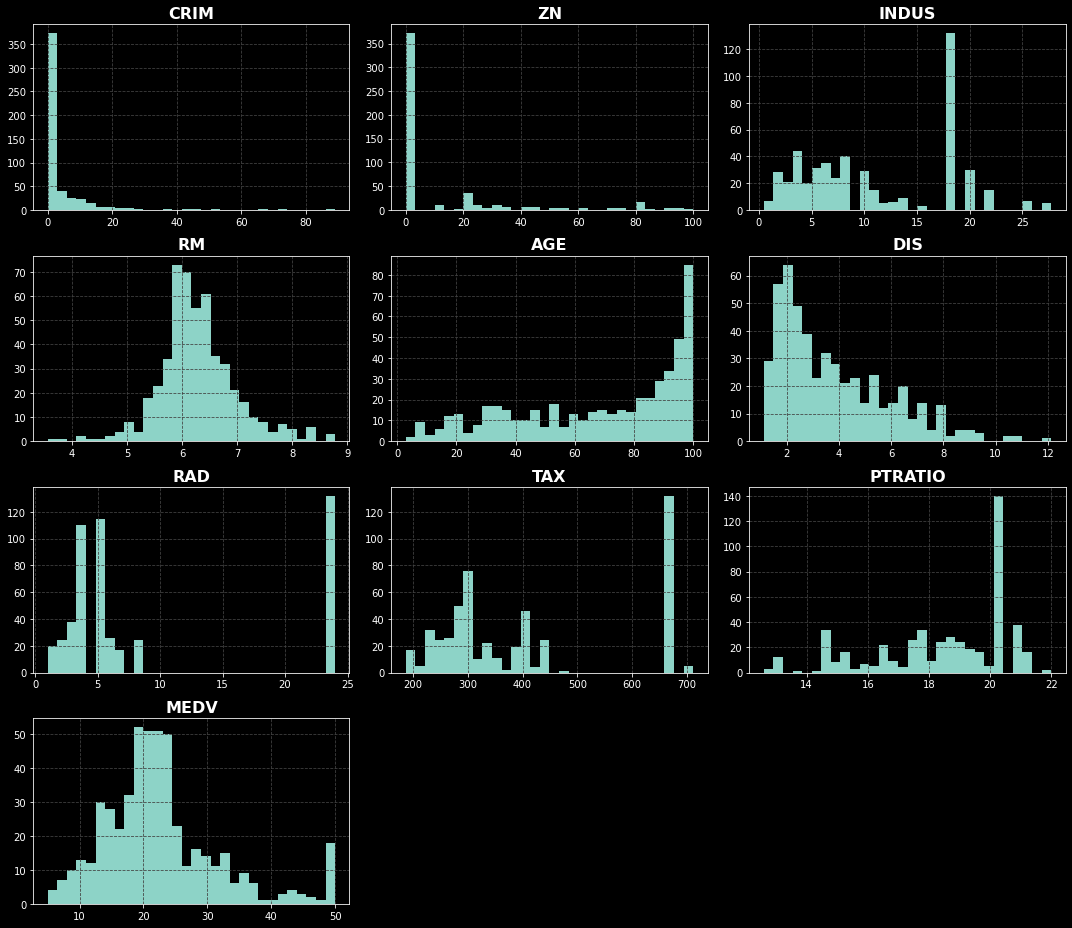

In [178]:
## plot histogram of each variable
bost_df.hist(figsize=(15,13), bins=30)
plt.show()

<br>

Custom function to loop through df and create histogram of each variable.

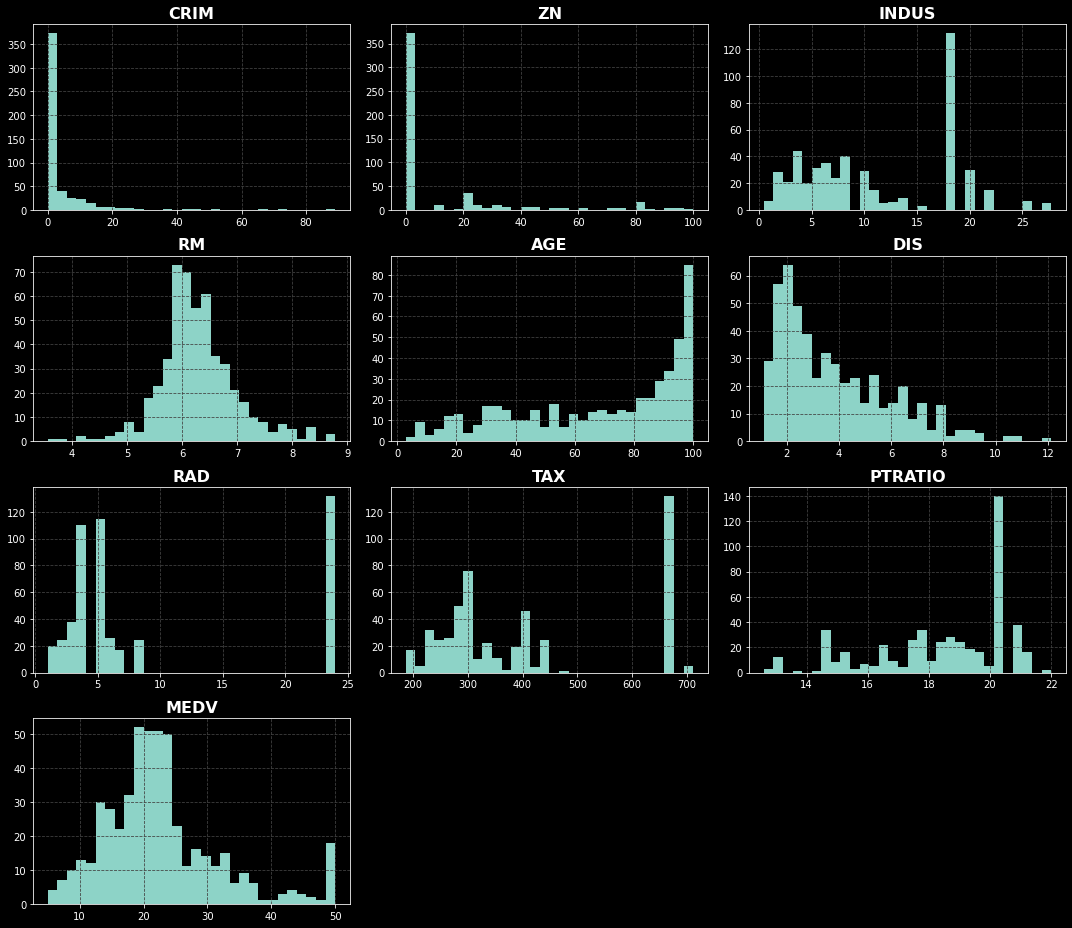

In [252]:
def df_plot(df, plot_type, hist_bins=10, n_plot_cols=3, figsize=None):
    cols = df.columns  # get list of column names
    n_vars = len(cols) # get number of variables in df
    n_plot_cols = n_plot_cols  # get number of columns that will be in the subplot figure
    n_plot_rows = math.ceil(n_vars / n_plot_cols)  # based on the number of columns in the subplot figure & number of df columns, calculate how many rows should be in the figure
    
    plt.figure(figsize=figsize)  # set figure size
    
    graph_cnt = 1  # initiate counter for variable plots
    for r in range(1, n_plot_rows+1):  # for row in subplot figure
        for c in range(1, n_plot_cols+1):  # for col in subplot figure
            if graph_cnt > n_vars:  # if variable counter is greater than the number of variables in the df, break the loop
                break
            else:  # else plot each variable in the correct subplot location going from left->right, top->bottom
                plt.subplot(n_plot_rows, n_plot_cols, graph_cnt)
                if plot_type.lower() == 'hist':
                    plt.hist(df.iloc[:, graph_cnt-1], bins=hist_bins)
                
                plt.title(cols[graph_cnt-1])
                graph_cnt += 1
                    
    plt.show()
    
    
df_plot(bost_df, plot_type='hist', hist_bins=30, figsize=(15,13))

<br>

Scatter plot

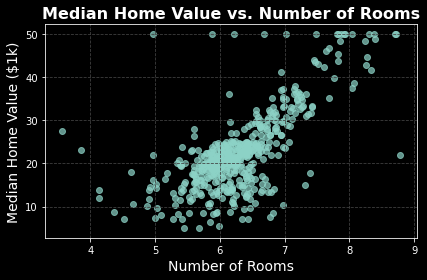

In [261]:
plt.scatter(
    x=df['RM']
    , y=df['MEDV']
    , alpha=.7
)
plt.title('Median Home Value vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Home Value ($1k)')
plt.show()

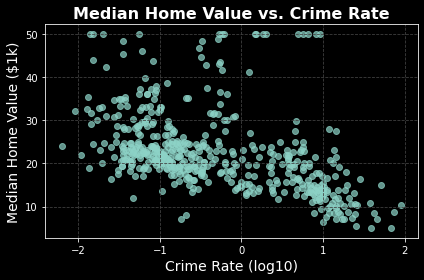

In [263]:
plt.scatter(
    x=np.log10(df['CRIM'])
    , y=df['MEDV']
    , alpha=.7
)
plt.title('Median Home Value vs. Crime Rate')
plt.xlabel('Crime Rate (log10)')
plt.ylabel('Median Home Value ($1k)')
plt.show()

Summary statistics

In [265]:
bost_df.describe()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.601545,23.322453,6.860353,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.677082,12.500000,18.100000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


<br>

Percent (%) of houses < $20k

In [275]:
p = round(100 * sum(bost_df['MEDV'] < 20) / len(bost_df), 2)

print(f"{p}% of homes are less thatn $20k")

41.5% of homes are less thatn $20k


<br>


## <span style="color:#ae8bd5">Activity 6</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br>

***

# <span style="color:#bce35b">Series and Basic Arithmetic</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br><br>

Below code is for practice only

In [163]:
np.arange(start=1, stop=20, step=2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [164]:
np.arange(start=30, stop=-1, step=-2)

array([30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10,  8,  6,  4,  2,  0])

In [165]:
np.linspace(start=1, stop=10, num=5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [166]:
np.linspace(start=30, stop=0, num=20)

array([30.        , 28.42105263, 26.84210526, 25.26315789, 23.68421053,
       22.10526316, 20.52631579, 18.94736842, 17.36842105, 15.78947368,
       14.21052632, 12.63157895, 11.05263158,  9.47368421,  7.89473684,
        6.31578947,  4.73684211,  3.15789474,  1.57894737,  0.        ])

In [167]:
a1 = rng.integers(1,100,30)

a1

array([90, 61, 35, 38, 10, 60, 45, 96, 32, 20, 32, 34, 35, 57, 42, 54, 50,
       73,  6, 43, 94,  6, 61, 17, 63, 75, 51, 68, 53, 70], dtype=int64)

In [168]:
a1_re = a1.reshape(2,3,5)
a1_re

array([[[90, 61, 35, 38, 10],
        [60, 45, 96, 32, 20],
        [32, 34, 35, 57, 42]],

       [[54, 50, 73,  6, 43],
        [94,  6, 61, 17, 63],
        [75, 51, 68, 53, 70]]], dtype=int64)

In [169]:
a1_re[1,0,3]
## index[1] in axis 0
## index[0] in axis 1
## index[3] in axis 2

6

In [170]:
a1_re.size, a1_re.shape, a1_re.ndim

(30, (2, 3, 5), 3)

In [171]:
a1_rav = a1_re.ravel()
a1_rav

array([90, 61, 35, 38, 10, 60, 45, 96, 32, 20, 32, 34, 35, 57, 42, 54, 50,
       73,  6, 43, 94,  6, 61, 17, 63, 75, 51, 68, 53, 70], dtype=int64)

In [172]:
a2 = rng.integers(1,10,20).reshape(4,5)
a2

array([[4, 1, 1, 1, 4],
       [9, 6, 4, 4, 1],
       [3, 2, 3, 5, 8],
       [3, 6, 1, 8, 8]], dtype=int64)

In [173]:
df = pd.DataFrame(a2)
df

,0,1,2,3,4
0,4,1,1,1,4
1,9,6,4,4,1
2,3,2,3,5,8
3,3,6,1,8,8


In [174]:
df1 = df.drop(0, axis=1)
df1

,1,2,3,4
0,1,1,1,4
1,6,4,4,1
2,2,3,5,8
3,6,1,8,8


In [175]:
rng.binomial(n=8, p=.6, size=10)

array([6, 6, 6, 3, 4, 4, 7, 6, 6, 6], dtype=int64)